# Folktables Exercises

This notebook explores fairlearn's capabilities within classification. The do's and cant's knowledge within this notebook can also be applied to the modeling task within HMIS.

The following notebook uses the folktable data found [here](https://github.com/zykls/folktables). <br>
Full 2018 ACS documentation found [here](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2018.txt). <br>
Intro to ACS public use: [video link](https://www.census.gov/data/academy/webinars/2020/introduction-to-american-community-survey-public-use-microdata-sample-pums-files.html).

## Data Pipeline Explained

**Pre-processing:** The notebooks that use **folktables** do not require pre-processing. The methods from the folktables package provide datasets that are ready to serve as input to ML models. In regards to the pre-processing within **HMIS**, previous work within the UT HAI Lab provide methods to handle pre-processing (i.e. the datasets within HMIS are also ready to serve as input to ML models).

**In-processing:** Within this research project, we expirement with some in-processing techniques provided by fairlearn in attempt to mitigate bias during the traning phase of a model (e.g. fairlearn's <code>GridSearch</code>).

**Post-processing:** There are not many post-processing techniques that are used within this project (only fairlearn's <code>ThresholdOptimizer</code> alters ML outputs). Most of the work done within this research project deals with finding ways to identify and report possible biases across various modeling tasks.

### Definitions:

**ACS (American Community Survey)** - Information from the survey generates data that help determine how more than $675 billion in federal and state funds are distributed each year. Unlike the every-10-year census, this survey continues all year, every year. ACS randomly samples addresses in every state, the District of Columbia, and Puerto Rico. 

**ACSEmployment data**

<code> features </code> **- the independent variables**
* ['AGEP', 'SCHL', 'MAR', 'RELP', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC', 'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'SEX', 'RAC1P']
| Feature      | Description                   |
| :---         | :---                          |
| AGEP         | Age                           |
| SCHL         | Educational attainment        |
| MAR          | Marital status                |
| RELP         | Relationship                  |
| DIS          | Disability recode             |
| ESP          | Employment status of parents  |
| CIT          | Citizenship status            |
| MIG          | Mobility status (lived here 1 year ago)|
| MIL          | Military service              |
| ANC          | Ancestry recode               |
| NATIVITY     | Native or Foreign born        |
| DEAR         | Hearing difficulty            |
| DEYE         | Vision difficulty             |
| DREM         | Cognitive difficulty          |
| SEX          | Male or Female                |
| RAC1P        | Recoded detailed race code    |


       
<code> group </code> **- race group**
* 1    .White alone
* 2    .Black or African American alone
* 3    .American Indian alone
* 4    .Alaska Native alone
* 5    .American Indian and Alaska Native tribes specified; or American   Indian or Alaska Native, not specified and no other races
* 6    .Asian alone
* 7    .Native Hawaiian and Other Pacific Islander alone
* 8    .Some Other Race alone
* 9    .Two or More Races

<code>nav_group </code> **- native group**
* 1    .Native
* 2    .Foreign born

<code>sex_group </code> **- sex group**
* 1    .Male
* 2    .Female

<code> target variable </code> **- Employment status recode**
* b    .N/A (less than 16 years old) - <code>False</code>
* 1    .Civilian employed, at work - <code>True</code>
* 2    .Civilian employed, with a job but not at work - <code>False</code>
* 3    .Unemployed - <code>False</code>
* 4    .Armed forces, at work - <code>False</code>
* 5    .Armed forces, with a job but not at work - <code>False</code>
* 6    .Not in labor force - <code>False</code>

<code>cont_labels </code> **- Wages & income**

---

**datasets** - fetch sample datasets 

**metrics** - functionality for computing metrics with a focus on ‘disaggregated metrics’. This is a metric where in addition to y_true and y_pred values, the user provides information about group membership for each sample. 

**postprocessing** - methods which operate on the predictor (i.e. X) rather than the estimator (i.e. Y). 

**preprocessing**  - a filtering technique that eliminates sensitive correlations in the dataset. 

**reductions** - This module contains algorithms implementing the reductions approach to disparity mitigation. In this approach, disparity constraints are cast as Lagrange multipliers, which cause the reweighting and relabelling of the input data. This reduces the problem back to standard machine learning training.

### fairlearn can and can’t:
**can -**
* **Fairness Assessments** [link](https://fairlearn.org/main/user_guide/assessment.html)
* **Demographic Parity** - a fairness metric whose goal is to ensure a machine learning model’s predictions are independent of membership in a sensitive group. $$E[h(X)|A=a]=E[h(X)], \forall a$$
$$P[f(X) \leq z|A=a]=P[f(X)\leq z],  \forall a, z$$ where $A$ is a sensitive feature, $h$ is a classifier, and $f$ is a regressor.<br>
<code>demographic_parity_difference()</code>  - Returns the absolute difference between the highest and lowest selection rates of the sensitive groups. A result of 0 means there is a demographic parity. (only for classifiers). <br>
<code>demographic_parity_ratio()</code> - Returns the ratio of the lowest and highest selection rates. A result of 1 means there is a demographic parity.
* **Equalized Odds** - The goal of the equalized odds fairness metric is to ensure a machine learning model performs equally well for different groups. It is stricter than demographic parity because it requires that the machine learning model’s predictions are not only independent of sensitive group membership, but that groups have the same false positive rates and true positive rates. $$E[h(X)|A=a, Y=y]=E[h(X)|Y=y],  \forall a, y$$ AND 
that the true positive rate and false positive rate be equal across groups (classifiers). <br>
<code>equalized_odds_difference()</code> - Returns the largest difference between the TRP difference and FPR difference. <br>
<code>equalized_odds_ratio()</code> - Returns the the smallest ratio between the TRP ratio and FPR ratio. 
* **Equal Opportunity** - Equal opportunity is a relaxed version of equalized odds that only considers conditional expectations with respect to positive labels. NOTE: The developers of fairlearn suggest that this fairness metric can overlook misclassifications since it does not consider false positive rates.
* **Intersecting Groups** - Fairlearn supports metric assessment in the scenario of intersection of multiple sensitive features. <br>
<code>MetricFrame.by_group</code> - Returns a table that displays all the possible combinations of sensitive groups and their fairness metric results.
* **Control Feature**
* **Group by Group Visualizations**
* **Unfairness Mitigations** - algorithm related techniques to mitigate unfairness. Full list of algorithms and their basic descriptions found here.
---
* **Fairness Mitigation** [link](https://fairlearn.org/v0.8/user_guide/mitigation.html)
* <code>ExponentiatedGradient</code>
* <code>GridSearch</code>
* <code>ThresholdOptimizer</code>
* <code>CorrelationRemover</code>

**can’t -** 
* Fairly limited in number of postprocessing and preprocessing techniques. Most of the assessment tools that fairlearn offers inherit from the ‘metrics’ package.
* I have yet to find a focus on unsupervised related techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from folktables import ACSDataSource, ACSEmployment
import random

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score

from fairlearn.metrics import MetricFrame
from fairlearn.metrics import count, \
                              false_positive_rate, \
                              selection_rate, \
                              demographic_parity_difference, demographic_parity_ratio, \
                              equalized_odds_difference, equalized_odds_ratio
from fairlearn.postprocessing import ThresholdOptimizer

In [2]:
"""
Set random seeds
"""
train_test_state = 0

random.seed(0)

**NOTE:**The following exercise deals with trying different fairness metrics, and mitigation techniques with classifers.

In [3]:
# import the data
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
acs_data = data_source.get_data(states=["CA"], download=True)
features, label, group = ACSEmployment.df_to_pandas(acs_data)

# create sensitive feature(s):
nat_group = acs_data["NATIVITY"]
sex_group = acs_data["SEX"]

# convert 1D pd dataframes to Series objects
label = label.squeeze()
group = group.squeeze()

In [4]:
# identifying encodings
race = {
    1: "White alone",
    2: "Black or African American alone",
    3: "American Indian alone",
    4: "American Indian alone",
    5: "American Indian/Alaska Native specified/not specified or no other races", # truncated for index purposes
    6: "Asian alone",
    7: "Native Hawaiian and Other Pacific Islander alone",
    8: "Some Other Race alone",
    9: "Two or More Races"
}

In [5]:
###store accuracies of all the different models used###

###demographic parity###
# 1. logistic regression
# 2. logistic regression fairML
# 3. random forest
# 4. random forest fairML

###equalized odds###
# 1. logistic regression
# 2. logistic regression fairML
# 3. random forest
# 4. random forest fairML
acc_dem, acc_EO = [], []

In [6]:
# create a standard scaler for the data
scaler = StandardScaler().fit(features)

# slit the date to train and tests sets with a 80-20 split
X_train, X_test, y_train, y_test, group_train, group_test, sex_train, sex_test, nat_train, nat_test = train_test_split(
    features, label, group, sex_group, nat_group, test_size=0.2, random_state=train_test_state)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

---

## ---fairlearn assessment: logistic regression classifier---

In [7]:
# run a simple logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
#print("Linear Model Accuracy is:", accuracy)
acc_dem.append(accuracy_score(y_test, yhat))
acc_EO.append(accuracy_score(y_test, yhat))

In [8]:
# Construct a function dictionary
my_metrics = {
    'accuracy' : accuracy_score,
    'tpr' : recall_score,
    'fpr' : false_positive_rate,
    'sel' : selection_rate,
    'count' : count
}
# Construct a MetricFrame
mf = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=yhat,
    sensitive_features={"Race":group_test}
)

In [9]:
# overall True Positive Rate, False Positive Rate, Selection Rate, Counts
mf.overall

accuracy    0.772874
tpr         0.833304
fpr         0.277458
sel         0.530041
count          75764
dtype: object

In [10]:
# by group analysis
linear_results = mf.by_group.rename(index=race)

### Demographic Parity

In [11]:
diff_dem = demographic_parity_difference(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Difference is:", diff_dem)

The Demographic Parity Difference is: 0.1885935782227861


In [12]:
ratio_dem = demographic_parity_ratio(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Ratio is:", ratio_dem)

The Demographic Parity Ratio is: 0.6997011844862872


**Result(s):**
* A **demographic parity difference (DPD)** of 0 is what constitutes the presence of a demographic parity. For the race DPD, a result of 0.18859 means that a perfect demographic parity has not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the DPD - asian alone and 2+ more races.
* A **demographic parity ratio (DPR)** of 1 is what constitutes the presence of a demographic parity. For the race DPR, a result of 0.6997 means that a perfect demographic parity has not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the DPR - asian alone and 2+ more races.

### Equalized Odds

In [13]:
diff_EO = equalized_odds_difference(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Difference is:", diff_EO)

The Equalized Odds Difference is: 0.38742159128425224


In [14]:
ratio_EO = equalized_odds_ratio(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Ratio is:", ratio_EO)

The Equalized Odds Ratio is: 0.38571428571428573


**Result(s):**
* A **equalized odds difference (EOD)** of 0 is what constitutes the presence of equalized odds. For the race EOD, a result of 0.3874 means that perfect equalized odds have not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the EOD - alaska native and asian alone. NOTE: The alaska native alone group only contains 4 entries.
* A **equalized odds ratio (EOR)** of 1 is what constitutes the presence of equalized odds. For the race EOR, a result of 0.3857 means that perfect equalized odds have not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the EOR - alaska native and asian alone. NOTE: The alaska native alone group only contains 4 entries.

## Reductions: ThresholdOptimizer - Logistic Regression

In [15]:
# define sensitive features in terms of train-test sets
sf_train = pd.DataFrame(data={
    "group_train" : group_train,
    "nat_train" : nat_train,
    "sex_train" : sex_train
    }
)

sf_test = pd.DataFrame(data={
    "group_test" : group_test,
    "nat_test" : nat_test,
    "sex_test" : sex_test
    }
)

In [16]:
# implementing fairlearn model optimizer
fair_model = LogisticRegression()
unmitigated_lr = fair_model.fit(X_train, y_train)

# define the constraint - example: demographic parity
# define the objective - example: balanced accuracy score
postprocess_est = ThresholdOptimizer(
                   estimator=unmitigated_lr,
                   constraints="demographic_parity",
                   objective="balanced_accuracy_score",
                   prefit=True,
                   predict_method='predict_proba') 

postprocess_est.fit(X_train, y_train, sensitive_features=group_train) # only use race

yhat = postprocess_est.predict(X_test, sensitive_features=group_test)

#accuracy = accuracy_score(y_test, yhat)
#print("The fairML model accuracy for Logistic Regression is:", accuracy)
acc_dem.append(accuracy_score(y_test, yhat))

In [17]:
# check demographic parity post fairML model
diff_fair_dem = demographic_parity_difference(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Difference is:", diff_fair_dem)

The Demographic Parity Difference is: 0.20735027223230496


In [18]:
# check demographic parity post fairML model
ratio_fair_dem = demographic_parity_ratio(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Ratio is:", ratio_fair_dem)

The Demographic Parity Ratio is: 0.7235329703569268


In [19]:
# Construct a MetricFrame
mf_threshold = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=yhat,
    sensitive_features={"Race":group_test}
)

linear_fairML_results_dem = mf_threshold.by_group.rename(index=race)

In [20]:
# implementing fairlearn model optimizer
fair_model = LogisticRegression()
unmitigated_lr = fair_model.fit(X_train, y_train)

# define the constraint - example: demographic parity
# define the objective - example: balanced accuracy score
postprocess_est = ThresholdOptimizer(
                   estimator=unmitigated_lr,
                   constraints="equalized_odds",
                   objective="balanced_accuracy_score",
                   prefit=True,
                   predict_method='predict_proba') 

postprocess_est.fit(X_train, y_train, sensitive_features=group_train)

yhat = postprocess_est.predict(X_test, sensitive_features=group_test)

#accuracy = accuracy_score(y_test, yhat)
#print("The fairML model accuracy for Logistic Regression is:", accuracy)
acc_EO.append(accuracy_score(y_test, yhat))

# FIX: do not print the accuracies, store them and display them into a plot

In [21]:
# check equalized odds parity post fairML model
diff_fair_EO = equalized_odds_difference(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Difference is:", diff_fair_dem)

The Equalized Odds Difference is: 0.20735027223230496


In [22]:
# check equalized odds post fairML model
ratio_fair_EO = equalized_odds_ratio(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Ratio is:", ratio_fair_EO)

The Equalized Odds Ratio is: 0.381123595505618


In [23]:
# Construct a MetricFrame
mf_threshold = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=yhat,
    sensitive_features={"Race":group_test}
)

linear_fairML_results_EO = mf_threshold.by_group.rename(index=race)

## ---fairlearn library: non-linear---

In [24]:
# fit a random forest classifer
model = RandomForestClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)
#accuracy = accuracy_score(y_test, yhat)
#print("Non-Linear Model Accuracy is:", accuracy)
acc_dem.append(accuracy_score(y_test, yhat))
acc_EO.append(accuracy_score(y_test, yhat))

In [25]:
# Construct a MetricFrame
mf = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=yhat,
    sensitive_features=group_test
)

In [26]:
# overall True Positive Rate, False Positive Rate, Selection Rate, Counts
mf.overall

accuracy    0.800816
tpr         0.812333
fpr         0.208777
sel         0.483039
count          75764
dtype: object

In [27]:
# by group analysis
RF_results = mf.by_group.rename(index=race)

### Demographic Parity

In [28]:
diff_RF_dem = demographic_parity_difference(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Difference is:", diff_RF_dem)

The Demographic Parity Difference is: 0.3573326248671626


In [29]:
ratio_RF_dem = demographic_parity_ratio(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Ratio is:", ratio_RF_dem)

The Demographic Parity Ratio is: 0.5235565001771165


**Result(s):**
* A **demographic parity difference (DPD)** of 0 is what constitutes the presence of a demographic parity. For the race DPD, a result of 0.3594 means that a perfect demographic parity has not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the DPD - alaskan native and 2+ more races.
* A **demographic parity ratio (DPR)** of 1 is what constitutes the presence of a demographic parity. For the race DPR, a result of 0.5207 means that a perfect demographic parity has not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the DPR - alaskan native and 2+ more races.

NOTE: The alaska native alone group only contains 4 entries.

### Equalized Odds

In [30]:
diff_RF_EO = equalized_odds_difference(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Difference is:", diff_RF_EO)

The Equalized Odds Difference is: 0.35546218487394954


In [31]:
ratio_RF_EO = equalized_odds_ratio(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Ratio is:", ratio_RF_EO)

The Equalized Odds Ratio is: 0.28907563025210087


**Result(s):**
* A **equalized odds difference (EOD)** of 0 is what constitutes the presence of equalized odds. For the race EOD, a result of 0.3575 means that perfect equalized odds have not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the EOD - alaska native and 2+ more races. 
* A **equalized odds ratio (EOR)** of 1 is what constitutes the presence of equalized odds. For the race EOR, a result of 0.2848 means that perfect equalized odds have not been achieved. If we take a look at the by group analysis we can see which race selection rates were used to calculate the EOR - alaska native and 2+ more races.

**NOTE:** The alaska native alone group only contains 4 entries.

## Reductions: ThresholdOptimizer - Random Forest

In [32]:
# implementing fairlearn model optimizer
fair_model = RandomForestClassifier()
unmitigated_rf = fair_model.fit(X_train, y_train)

# define the constraint - example: demographic parity
# define the objective - example: balanced accuracy score
postprocess_est = ThresholdOptimizer(
                   estimator=unmitigated_rf,
                   constraints="demographic_parity",
                   objective="balanced_accuracy_score",
                   prefit=True,
                   predict_method='predict_proba') 

postprocess_est.fit(X_train, y_train, sensitive_features=group_train)

yhat = postprocess_est.predict(X_test, sensitive_features=group_test)

#accuracy = accuracy_score(y_test, yhat)
#print("The fairML model accuracy for Random Forest is:", accuracy)
acc_dem.append(accuracy_score(y_test, yhat))

In [33]:
# check demographic parity post fairML model
diff_fairRF_dem = demographic_parity_difference(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Difference is:", diff_fairRF_dem)

The Demographic Parity Difference is: 0.270121094172343


In [34]:
# check demographic parity post fairML model
ratio_fairRF_dem = demographic_parity_ratio(y_test, yhat, sensitive_features=group_test)
print("The Demographic Parity Ratio is:", ratio_fairRF_dem)

The Demographic Parity Ratio is: 0.6398385411035427


In [35]:
# Construct a MetricFrame
mf_threshold = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=yhat,
    sensitive_features={"Race":group_test}
)

RF_fairML_results_dem = mf.by_group.rename(index=race)

In [36]:
# implementing fairlearn model optimizer
fair_model = RandomForestClassifier()
unmitigated_rf = fair_model.fit(X_train, y_train)

# define the constraint - example: equalized odds
# define the objective - example: balanced accuracy score
postprocess_est = ThresholdOptimizer(
                   estimator=unmitigated_rf,
                   constraints="equalized_odds",
                   objective="balanced_accuracy_score",
                   prefit=True,
                   predict_method='predict_proba') 

postprocess_est.fit(X_train, y_train, sensitive_features=group_train)

yhat = postprocess_est.predict(X_test, sensitive_features=group_test)

#accuracy = accuracy_score(y_test, yhat)
#print("The fairML model accuracy for Random Forest is:", accuracy)
acc_EO.append(accuracy_score(y_test, yhat))

In [37]:
# check demographic parity post fairML model
diff_fairRF_EO = equalized_odds_difference(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Difference is:", diff_fairRF_EO)

The Equalized Odds Difference is: 0.26796828543111995


In [38]:
# check demographic parity post fairML model
ratio_fairRF_EO = equalized_odds_ratio(y_test, yhat, sensitive_features=group_test)
print("The Equalized Odds Ratio is:", ratio_fairRF_EO)

The Equalized Odds Ratio is: 0.46406342913776016


In [39]:
# Construct a MetricFrame
mf_threshold = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=yhat,
    sensitive_features={"Race":group_test}
)

RF_fairML_results_EO = mf_threshold.by_group.rename(index=race)

## ---Visualizing Results---

In [40]:
import matplotlib.pyplot as plt

In [41]:
## Order of Results:
##
## 1. linear_results
## 2. linear_fairML_results_dem
## 3. RF_results
## 4. RF_fairML_results_dem
s = "American Indian alone" # we drop American Indian because there are not many observations for this race
dem1 = linear_results.drop([s])["sel"].max() - linear_results.drop([s])["sel"].min()
dem2 = linear_fairML_results_dem.drop([s])["sel"].max() - linear_fairML_results_dem.drop([s])["sel"].min()
dem3 = RF_results.drop([s])["sel"].max() - RF_results.drop([s])["sel"].min()
dem4 = RF_fairML_results_dem.drop([s])["sel"].max() - RF_fairML_results_dem.drop([s])["sel"].min()

EO1 = linear_results.drop([s])["sel"].max() - linear_results.drop([s])["sel"].min()
EO2 = linear_fairML_results_EO.drop([s])["sel"].max() - linear_fairML_results_EO.drop([s])["sel"].min()
EO3 = RF_results.drop([s])["sel"].max() - RF_results.drop([s])["sel"].min()
EO4 = RF_fairML_results_EO.drop([s])["sel"].max() - RF_fairML_results_EO.drop([s])["sel"].min()

dem_diffs = {
    "Logistic"       : dem1,
    "LogisticFairML" : dem2,
    "RF"           : dem3,
    "RFFairML"     : dem4
}

EO_diffs = {
    "Logistic"       : EO1,
    "LogisticFairML" : EO2,
    "RF"           : EO3,
    "RFFairML"     : EO4
}

Text(0, 0.5, 'Accuracy Score')

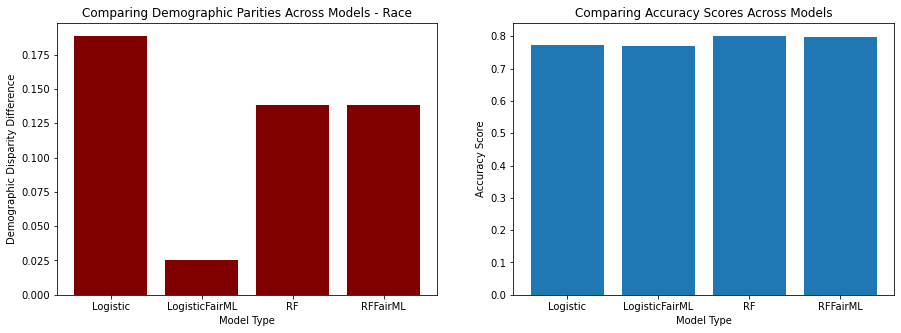

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# creating the bar plot for demographic differences
axes[0].bar(dem_diffs.keys(), dem_diffs.values(), color ='maroon')
axes[0].set_title("Comparing Demographic Parities Across Models - Race")
axes[0].set_ylabel("Demographic Disparity Difference")
axes[0].set_xlabel("Model Type")

# creating the bar plot for accuracies
axes[1].bar(dem_diffs.keys(), acc_dem)
axes[1].set_title("Comparing Accuracy Scores Across Models")
axes[1].set_xlabel("Model Type")
axes[1].set_ylabel("Accuracy Score")

In [43]:
1 - (dem_diffs["LogisticFairML"] / dem_diffs["Logistic"])

0.8643960644429437

In [44]:
dem_diffs["Logistic"]

0.1885935782227861

In [45]:
dem_diffs["LogisticFairML"]

0.02557403142779735

Text(0.5, 0, 'Model Type')

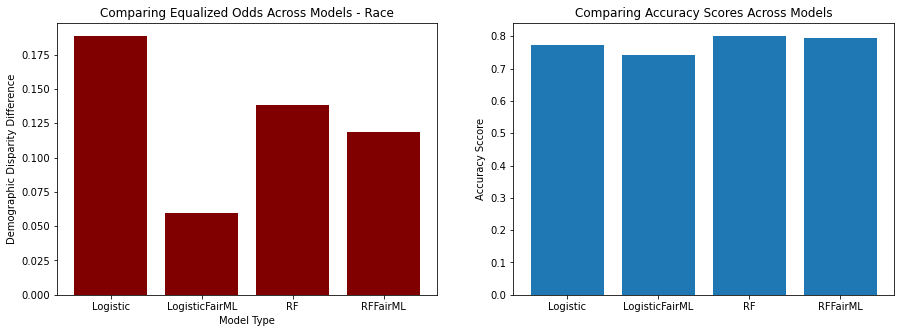

In [46]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# creating the bar plot for Equalized Odds differences
axes[0].bar(EO_diffs.keys(), EO_diffs.values(), color ='maroon')
axes[0].set_title("Comparing Equalized Odds Across Models - Race")
axes[0].set_ylabel("Demographic Disparity Difference")
axes[0].set_xlabel("Model Type")

# creating the bar plot for accuracies
axes[1].bar(EO_diffs.keys(), acc_EO)
axes[1].set_title("Comparing Accuracy Scores Across Models")
axes[1].set_ylabel("Accuracy Sccore")
axes[0].set_xlabel("Model Type")